In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
# reading in csv
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
df.iloc[8]

tweet_text                                            Beautifully smart and simple idea RT @madebyma...
emotion_in_tweet_is_directed_at                                                      iPad or iPhone App
is_there_an_emotion_directed_at_a_brand_or_product                                     Positive emotion
Name: 8, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
# looking at total missing per column
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [8]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

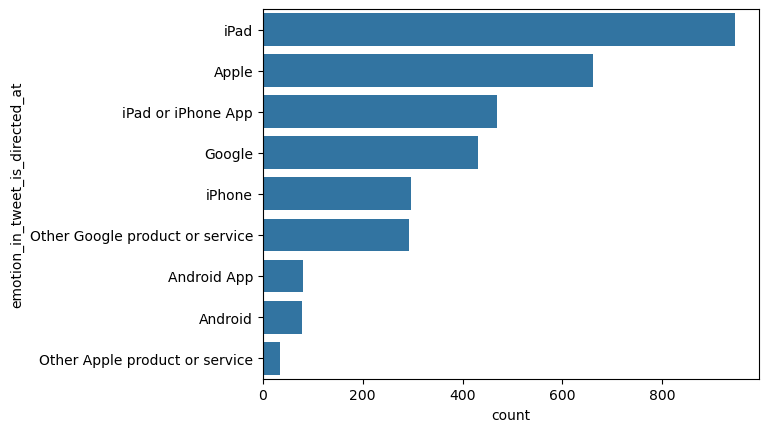

In [9]:
# Count occurrences of each unique value in 'emotion_in_tweet_is_directed_at'
x = df['emotion_in_tweet_is_directed_at'].value_counts()

# Extract unique values of 'emotion_in_tweet_is_directed_at' for y-axis labels
y = x.index

# Create bar plot
sns.barplot(x=x, y=y);

In [10]:
# comparing positive and negative reviews of the iPad
positive_ipad = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'iPad') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
print(f'Positive ipad tweets: {positive_ipad["tweet_text"].count()}')

negative_ipad = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'iPad') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
print(f'Negative ipad tweets: {negative_ipad["tweet_text"].count()}')

Positive ipad tweets: 793
Negative ipad tweets: 125


In [11]:
# comparing positive and negative reviews of Apple in general
positive_apple = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'Apple') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
print(f'Positive apple tweets: {positive_apple["tweet_text"].count()}')

negative_apple = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'Apple') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
print(f'Negative apple tweets: {negative_apple["tweet_text"].count()}')

Positive apple tweets: 543
Negative apple tweets: 95


In [12]:
# comparing positive and negative reviews of Apple apps in general
positive_apple_app = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'iPad or iPhone App') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
print(f'Positive apple app tweets: {positive_apple_app["tweet_text"].count()}')

negative_apple_app = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'iPad or iPhone App') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
print(f'Negative apple app tweets: {negative_apple_app["tweet_text"].count()}')

Positive apple app tweets: 397
Negative apple app tweets: 63


In [13]:
# comparing positive and negative reviews of Google products
positive_google = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'Google') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
print(f'Positive google tweets: {positive_google["tweet_text"].count()}')

negative_google = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'Google') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
print(f'Negative google tweets: {negative_google["tweet_text"].count()}')

Positive google tweets: 346
Negative google tweets: 68


In [14]:
# comparing positive and negative reviews of the iPhone .... this one is almost equally positive and negative
positive_iphone = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'iPhone') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
print(f'Positive iphone tweets: {positive_iphone["tweet_text"].count()}')

negative_iphone = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'iPhone') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
print(f'Negative iphone tweets: {negative_iphone["tweet_text"].count()}')

Positive iphone tweets: 184
Negative iphone tweets: 103


In [15]:
# comparing positive and negative reviews of Androids
positive_android = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'Android') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
print(f'Positive android tweets: {positive_android["tweet_text"].count()}')

negative_android = df.loc[(df['emotion_in_tweet_is_directed_at'] == 'Android') & (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]
print(f'Negative android tweets: {negative_android["tweet_text"].count()}')

Positive android tweets: 69
Negative android tweets: 8


# Looking at double quotes (from Rick)

In [16]:
from IPython.display import display, HTML

df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

re_single_quotes = r"'([a-zA-Z]+(?:[-'][a-zA-Z]+)*)'"

df['occurs'] = df['tweet_text'].str.contains(re_single_quotes)
df_filtered = df.loc[df['occurs']==True]

pd.set_option('display.max_colwidth', 300)
pd.set_option('display.width', 300)
display(HTML(df_filtered.to_html(index=False)))

/var/folders/r7/dkcrrdg1099bt6wjv8tr4trc0000gn/T/ipykernel_14434/3068279230.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['occurs'] = df['tweet_text'].str.contains(re_single_quotes)


tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,occurs
&quot;via @mention : {link} Guy Kawasaki talks 'Enchanted' at SXSW - HE knows his stuff! #books #internet #Apple #sxsw &quot;,NaN,No emotion toward brand or product,True
"Do I need any more for #sxsw! ipad, iphone, laptop, dictaphone, vid.camera.... Wow! Love to meet the REAL 'cerebellum' charged people:)",iPhone,Positive emotion,True
ÛÏ@mention Apple is a great example of a retail store layed out for the future - no 'registers' no 'checkout line' #sxsw,Apple,Positive emotion,True
&quot;the future of local is contextual discovery.&quot; Google's Marissa Mayer argues 'where' is exceptionally valuable for any type of search. #SXSW,NaN,No emotion toward brand or product,True
Wishing I was at #sxsw to see the rumored demo of @mention new social network 'Circles' {link} (via @mention,Other Google product or service,Positive emotion,True
OH: &quot;While we're here we should check out this new iPad 2 'thing'.&quot; #SXSW #strangeproblems,iPad,Positive emotion,True
@mention 'GoodGuide' iphone app scans barcode to rank environmental responsibility of the company-nice pressure!#smmnextgen #sxsw,iPad or iPhone App,Positive emotion,True
"Is there any way of deleting an app that won't stop loading on the iPhone? Draining my power, but no 'x' to cancel. Help me, #SXSW.",iPad or iPhone App,Negative emotion,True
"Great location choice, and nice timing for iPad2 launch: #Apple, #HP 'popping' in for #SXSW {link}",iPad,Positive emotion,True
"AOL, T-Mobile Launch 'Play' Android App {link} via @mention #sxsw",NaN,No emotion toward brand or product,True


# Looking at Emojis

In [17]:
! python -m pip install emoji --upgrade

In [18]:
# Fill NaN values with an empty string
df['tweet_text'] = df['tweet_text'].fillna('')

In [19]:
# locating any row that contains ':D'
df.loc[df['tweet_text'].str.contains('\:D', case=True, regex=True)][:5]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,occurs
260,Our #sxsw app is now on #android :D huge props to @mention @mention @mention &amp; @mention Get it now: {link},NaN,No emotion toward brand or product,False
2621,"Which line at #SXSW will be longer? 3/11 at the temp Apple store for the iPad2? Or 3/14 at the Microsoft booth for IE9? [Yeah, right!] :D",Apple,Positive emotion,False
2671,And for de Ipad :D?? RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW {link},NaN,No emotion toward brand or product,False
2819,I am amused at the Apple Pop-up store at #SXSW this year. Brilliant idea... just brilliant. :D {link},Apple,Positive emotion,False
3479,@mention Hi Josh. Do yo have an iPhone. Do you have Beluga? Do you get text for DMs? :D #sxsw #sxswi contact plans,NaN,No emotion toward brand or product,False


In [20]:
grin = df.loc[df['tweet_text'].str.contains('\:D', case=True, regex=True)]
len(grin)

12

In [21]:
#emoticons_list = ['\:D', '\:\)', '\:/', '\:-D', '\:p', '\:P', '\:\(']
#emoticons_dictionary = {'\:D':'em_smile', '\:)':'em_smile', '\:/':'em_unsure', '\:-D':'em_smile', '\:p':'tongue', '\:P':'tongue', '\:(':'frown'}

In [22]:
# locating any row that contains ':\'
df.loc[df['tweet_text'].str.contains('\:\)', case=True, regex=True)][:5]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,occurs
78,"iPad2? RT @mention Droid &amp; Mac here :) RT @mention My #agnerd confession, using laptop, iPad &amp; blackberry to follow #SXSW",NaN,No emotion toward brand or product,False
201,"U = smart 4 packing an extra :) RT @mention On my way to sunny Austin for #sxsw! Extra iPhone in stow, just in case. @mention @mention",NaN,No emotion toward brand or product,False
257,"Do I need any more for #sxsw! ipad, iphone, laptop, dictaphone, vid.camera.... Wow! Love to meet the REAL 'cerebellum' charged people:)",iPhone,Positive emotion,True
288,ÛÏ@mention Apple store downtown Austin open til Midnight. #sxswÛ @mention there's still time :),Apple,Positive emotion,False
296,Temporary Apple store at SXSW is really cool...as is the iPad 2 :) #apple #SXSW #fanboy,iPad,Positive emotion,False


In [23]:
'''
def change_emoticon(data):
    data = data.str.replace('(?i)\:D', 'emoji_smile')
    data = data.str.replace('(?i)\:\)', 'emoji_smile')
    data = data.str.replace('(?i)\:-D', 'emoji_smile')
    data = data.str.replace('(?i)\:\\', 'emoji_unsure')
    data = data.str.replace('(?i)\:p', 'emoji_tongue')
    data = data.str.replace('(?i)\:P', 'emoji_tongue')
    data = data.str.replace('(?i)\:\(', 'emoji_sad')
    return data '''

"\ndef change_emoticon(data):\n    data = data.str.replace('(?i)\\:D', 'emoji_smile')\n    data = data.str.replace('(?i)\\:\\)', 'emoji_smile')\n    data = data.str.replace('(?i)\\:-D', 'emoji_smile')\n    data = data.str.replace('(?i)\\:\\', 'emoji_unsure')\n    data = data.str.replace('(?i)\\:p', 'emoji_tongue')\n    data = data.str.replace('(?i)\\:P', 'emoji_tongue')\n    data = data.str.replace('(?i)\\:\\(', 'emoji_sad')\n    return data "

In [24]:
# Apply the function directly to the DataFrame column
#df['tweet_text'] = change_emoticon(df['tweet_text'])

In [25]:
'''def change_emoticon(data):
    data = data.str.replace('\:D', 'emoji_smile')
    data = data.str.replace('\:\)', 'emoji_smile')
    data = data.str.replace('\:-D', 'emoji_smile')
    data = data.str.replace('\:\\', 'emoji_unsure')
    data = data.str.replace('\:p', 'emoji_tongue')
    data = data.str.replace('\:P', 'emoji_tongue')
    data = data.str.replace('\:\(', 'emoji_sad')
    return data '''

"def change_emoticon(data):\n    data = data.str.replace('\\:D', 'emoji_smile')\n    data = data.str.replace('\\:\\)', 'emoji_smile')\n    data = data.str.replace('\\:-D', 'emoji_smile')\n    data = data.str.replace('\\:\\', 'emoji_unsure')\n    data = data.str.replace('\\:p', 'emoji_tongue')\n    data = data.str.replace('\\:P', 'emoji_tongue')\n    data = data.str.replace('\\:\\(', 'emoji_sad')\n    return data "

In [26]:
# Apply the function directly to the DataFrame column
#df['tweet_text'] = change_emoticon(df['tweet_text'])

In [27]:
import re

def replace_emoticons(text):
    # Define a dictionary mapping emoticons to their corresponding meanings
    emoticon_mapping = {
        ':D': 'emoji_smile',
        ':)': 'emoji_smile',
        ':-D': 'emoji_smile',
        ':\\': 'emoji_unsure',
        ':p': 'emoji_tongue',
        ':P': 'emoji_tongue',
        ':(': 'emoji_sad'
        # Add more emoticons and their meanings as needed
    }
    
    # Define a regular expression pattern to match emoticons
    pattern = re.compile('|'.join(re.escape(emoticon) for emoticon in emoticon_mapping.keys()))
    
    # Replace each matched emoticon with its corresponding meaning
    def replace(match):
        return emoticon_mapping[match.group(0)]
    
    return pattern.sub(replace, text)

# Example usage:
# Assuming df is your DataFrame and 'tweet_text' is the column containing tweets
df['tweet_text'] = df['tweet_text'].apply(replace_emoticons)

In [28]:
# checking to make sure it worked
df.iloc[78]

tweet_text                                            iPad2? RT @mention Droid &amp; Mac here emoji_smile RT @mention My #agnerd confession, using laptop, iPad &amp; blackberry to follow #SXSW
emotion_in_tweet_is_directed_at                                                                                                                                                              NaN
is_there_an_emotion_directed_at_a_brand_or_product                                                                                                            No emotion toward brand or product
occurs                                                                                                                                                                                     False
Name: 78, dtype: object

In [29]:
# making sure this returns no tweets
df.loc[df['tweet_text'].str.contains('\:\)', case=True, regex=True)]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,occurs


In [30]:
import string
from IPython.display import display, HTML

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Preprocessing (from Sarah)

In [31]:
df = df.rename(columns = {'tweet_text': 'tweet', 
                         'emotion_in_tweet_is_directed_at': 'product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})

In [32]:
df['tweet'] = df['tweet'].astype(str)

In [33]:
#literally just saving this so i dont lose it, trying tweet tokenizer above 

def preprocess_tweet(tweet):
    #remove links
    tweet = re.sub(r'http\S+|@\S+', '', tweet)
    
    # remove {link} from rows
    tweet1 = re.sub(r'\{link\}', '', tweet)
    
    # Replace &quot; with "
    tweet2 = tweet1.replace('&quot;', '"')
    
    # Remove extra space between quotation mark and words
    tweet3 = re.sub(r'\s+"', '"', tweet2)
    tweet4 = re.sub(r'"\s+', '"', tweet3)
    
    #convert to lowercase
    tweet5 = tweet4.lower()
    
    # remove numbers
    tweet6 = re.sub(r'\d+', '', tweet5)
    
    #remove punctuation 
    tweet7 = re.sub(r'([^\w\s]|_)+', ' ', tweet6)
    
    #tokenize
    tokens = nltk.word_tokenize(tweet7)
    
    #add stopwords
    additional_stopwords = {'w', 'u', 'amp', 'sxsw', 'rt'} # amp = & 
    
    stop_words = set(stopwords.words('english')) | additional_stopwords
   # stop_words.update(additional_stopwords)
    
    tweet8 = [word for word in tokens if word not in stop_words]
    
    #join words back into single string
    #doc_tokenized = ' '.join(tweet8)
    return tweet8


df['tweet'] = df['tweet'].apply(preprocess_tweet)

In [34]:
df.head()

,tweet,product,sentiment,occurs
0,"[g, iphone, hrs, tweeting, rise, austin, dead, need, upgrade, plugin, stations]",iPhone,Negative emotion,False
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]",iPad or iPhone App,Positive emotion,False
2,"[wait, ipad, also, sale]",iPad,Positive emotion,False
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,False
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, matt, mullenweg, wordpress]",Google,Positive emotion,False


In [41]:
import nltk
from nltk.corpus import wordnet

def get_wordnet_pos(tokens):
    """Map POS tag to first character lemmatize() accepts"""
    tags = nltk.pos_tag(tokens)
    pos_tags = []
    for _, tag in tags:
        tag = tag[0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        pos_tags.append(tag_dict.get(tag, wordnet.NOUN))
    return pos_tags

# Assuming df['tweet'] is a column containing lists of tokens
df['pos'] = df['tweet'].apply(get_wordnet_pos)

In [42]:
df.iloc[8]

tweet        [beautifully, smart, simple, idea, wrote, hollergram, ipad, app]
product                                                                 Apple
sentiment                                                    Positive emotion
occurs                                                                  False
pos                                                  [r, a, a, n, v, a, n, n]
Name: 8, dtype: object

In [37]:
# to lemmatize
import nltk
from nltk.stem import WordNetLemmatizer

def lemmer(doc_tokenized):
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each token in the document
    doc_tokenized = [lemmatizer.lemmatize(word) for word in doc_tokenized]
    return doc_tokenized

# Example usage:
# Assuming df['tweet'] contains the text data to be lemmatized
df['tweet'] = df['tweet'].apply(lemmer)

In [38]:
df.head(10)

,tweet,product,sentiment,occurs,pos
0,"[g, iphone, hr, tweeting, rise, austin, dead, need, upgrade, plugin, station]",iPhone,Negative emotion,False,"[n, n, n, v, n, n, a, n, a, n, n]"
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, t]",iPad or iPhone App,Positive emotion,False,"[v, a, n, n, n, a, n, n, r, v, a, n]"
2,"[wait, ipad, also, sale]",iPad,Positive emotion,False,"[n, n, r, n]"
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,False,"[n, n, n, a, n, n, n]"
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, book, conference, matt, mullenweg, wordpress]",Google,Positive emotion,False,"[a, n, n, n, n, n, n, r, a, n, n, v, n, n]"
5,"[new, ipad, apps, speechtherapy, communication, showcased, conference, iear, edchat, asd]",NaN,No emotion toward brand or product,False,"[a, n, n, n, n, v, n, n, n, n]"
6,[],NaN,No emotion toward brand or product,NaN,[]
7,"[starting, ctia, around, corner, googleio, hop, skip, jump, good, time, android, fan]",Android,Positive emotion,False,"[v, n, n, n, n, n, a, n, a, n, a, n]"
8,"[beautifully, smart, simple, idea, wrote, hollergram, ipad, app]",iPad or iPhone App,Positive emotion,False,"[r, a, a, n, v, a, n, n]"
9,"[counting, day, plus, strong, canadian, dollar, mean, stock, apple, gear]",Apple,Positive emotion,False,"[n, n, n, a, a, n, n, n, n, n]"


In [39]:
df.iloc[8]

tweet        [beautifully, smart, simple, idea, wrote, hollergram, ipad, app]
product                                                    iPad or iPhone App
sentiment                                                    Positive emotion
occurs                                                                  False
pos                                                  [r, a, a, n, v, a, n, n]
Name: 8, dtype: object

In [40]:
# combined and renamed Apple products and non Apple products 

df['product'] = df['product'].replace({
    'iPad': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Other',
    'Other Google product or service': 'Other',
    'Android App': 'Other',
    'Android': 'Other'
})

In [45]:
apple_df = df.loc[df['product'] == 'Apple']

In [46]:
apple_df.head()

,tweet,product,sentiment,occurs,pos
0,"[g, iphone, hr, tweeting, rise, austin, dead, need, upgrade, plugin, station]",Apple,Negative emotion,False,"[n, n, n, v, n, n, a, n, a, n, n]"
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, t]",Apple,Positive emotion,False,"[v, a, n, n, n, a, n, n, r, v, a, n]"
2,"[wait, ipad, also, sale]",Apple,Positive emotion,False,"[n, n, r, n]"
3,"[hope, year, festival, crashy, year, iphone, app]",Apple,Negative emotion,False,"[n, n, n, a, n, n, n]"
8,"[beautifully, smart, simple, idea, wrote, hollergram, ipad, app]",Apple,Positive emotion,False,"[r, a, a, n, v, a, n, n]"


In [47]:
apple_df['sentiment'].value_counts()

sentiment
Positive emotion                      1949
Negative emotion                       388
No emotion toward brand or product      65
I can't tell                             7
Name: count, dtype: int64